In [ ]:
!pip install datasets transformers rouge-score nltk accelerate


In [ ]:
!pip install datasets --upgrade --quiet

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install -U datasets huggingface_hub fsspec --quiet

import datasets, huggingface_hub, fsspec
print(datasets.__version__, huggingface_hub.__version__, fsspec.__version__)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 20.0.0 which is incompatible.
4.0.0 0.33.2 2025.3.0


In [ ]:
!pip install -U datasets==2.18.0 --force-reinstall --quiet



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.
pylibcudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 20.0.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.2.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is inco

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/newsroom
!cp "/content/drive/My Drive/newsroom-release.tar" /content/

In [ ]:
!cd /content/
!tar -xvf newsroom-release.tar

release/
release/dev.jsonl.gz
release/test.jsonl.gz
release/train.jsonl.gz


In [ ]:
!mkdir -p ~/tensorflow_datasets/downloads/manual/newsroom/
!mv /content/release/*.jsonl.gz ~/tensorflow_datasets/downloads/manual/newsroom/

In [ ]:
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/train.jsonl.gz
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/dev.jsonl.gz
!gunzip ~/tensorflow_datasets/downloads/manual/newsroom/test.jsonl.gz

gzip: /root/tensorflow_datasets/downloads/manual/newsroom/train.jsonl already exists; do you wish to overwrite (y or n)? y

y
gzip: /root/tensorflow_datasets/downloads/manual/newsroom/dev.jsonl already exists; do you wish to overwrite (y or n)? y
y
gzip: /root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl already exists; do you wish to overwrite (y or n)? y
y


In [ ]:

!find /content -iname "*xsum*"


In [ ]:
!find / -iname "*xsum*" 2>/dev/null


/root/.cache/huggingface/hub/.locks/datasets--xsum
/root/.cache/huggingface/hub/datasets--xsum
/root/.cache/huggingface/hub/datasets--xsum/snapshots/40db7604fedb616a9d2b0673d11838fa5be8451c/xsum.py
/usr/local/share/julia/stdlib/v1.10/Pkg/src/Resolve/maxsum.jl
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum_test.py
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum_disabled.py
/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/url_checksums/xsum.txt


In [ ]:
# Rename the conflicting TFDS file
!mv /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum.py \
    /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum_disabled.py


mv: cannot stat '/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum.py': No such file or directory


In [ ]:
!rm /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum.py
!rm /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum_test.py
!rm /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/url_checksums/xsum.txt


rm: cannot remove '/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum.py': No such file or directory


In [ ]:
!rm -rf /root/.cache/huggingface/datasets/xsum*


In [ ]:
!pip install datasets --quiet

from datasets import load_dataset

# ✅ CNN/DailyMail (explicit configuration name)
cnn_dm = load_dataset("cnn_dailymail", "3.0.0", split="train[:2000]")
from datasets import load_dataset

newsroom = load_dataset(
    "json",
    data_files={
        "train": "/root/tensorflow_datasets/downloads/manual/newsroom/train.jsonl",
        "validation": "/root/tensorflow_datasets/downloads/manual/newsroom/dev.jsonl",
        "test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"
    }
)

# Optional: limit the size for faster training/testing
newsroom["train"] = newsroom["train"].select(range(2000))
newsroom["validation"] = newsroom["validation"].select(range(500))
newsroom["test"] = newsroom["test"].select(range(500))

# Preview
print(newsroom["train"][0])






{'url': 'http://www.nytimes.com/2006/06/04/sports/soccer/04racism.html', 'archive': 'http://web.archive.org/web/20060618204254id_/http://www.nytimes.com:80/2006/06/04/sports/soccer/04racism.html?ei=5090&en=2cc7885a61bb8cf5&ex=1307073600&partner=rssuserland&emc=rss&pagewanted=all', 'title': 'Surge in Racist Mood Raises Concerns on Eve of World Cup', 'date': '20060618204254', 'text': 'HAMBURG, Germany, June 3 \x97 As he left the soccer field after a club match in the eastern German city of Halle on March 25, the Nigerian forward Adebowale Ogungbure was spit upon, jeered with racial remarks and mocked with monkey noises. In rebuke, he placed two fingers under his nose to simulate a Hitler mustache and thrust his arm in a Nazi salute.\n\nMarc Zoro, right, an Ivory Coast native, was a target of racial slurs from the home fans in Messina, Italy. Adriano, a star with Inter Milan, tried to persuade him to stay on the field.\n\nFrom now until its conclusion on July 9, Jeff Z. Klein and other st

In [ ]:
!rm -rf /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum.py
!rm -rf /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/summarization/xsum_test.py
!rm -rf /usr/local/lib/python3.11/dist-packages/tensorflow_datasets/url_checksums/xsum.txt
!rm -rf /root/.cache/huggingface/hub/datasets--xsum
!rm -rf /root/.cache/huggingface/datasets/xsum*


In [ ]:
!mkdir -p /content/xsum_parquet
!wget https://huggingface.co/datasets/xsum/resolve/main/data/train-00000-of-00001.parquet -O /content/xsum_parquet/train.parquet


--2025-07-11 08:33:43--  https://huggingface.co/datasets/xsum/resolve/main/data/train-00000-of-00001.parquet
Resolving huggingface.co (huggingface.co)... 54.230.71.28, 54.230.71.103, 54.230.71.2, ...
Connecting to huggingface.co (huggingface.co)|54.230.71.28|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /datasets/EdinburghNLP/xsum/resolve/main/data/train-00000-of-00001.parquet [following]
--2025-07-11 08:33:43--  https://huggingface.co/datasets/EdinburghNLP/xsum/resolve/main/data/train-00000-of-00001.parquet
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 404 Not Found
2025-07-11 08:33:43 ERROR 404: Not Found.



In [ ]:
# Remove old cached dataset versions and corrupted scripts
!rm -rf ~/.cache/huggingface/datasets/xsum*
!rm -rf ~/.cache/huggingface/hub/datasets--xsum
!rm -rf /root/.cache/huggingface/datasets/xsum*
!rm -rf /root/.cache/huggingface/hub/datasets--xsum


In [ ]:
# 3. XSum
xsum = load_dataset("knkarthick/xsum")
xsum_small = {
    split: xsum[split].shuffle(seed=123).select(range(2000))
    for split in ["train", "validation", "test"]
}

README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/480M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/26.3M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 426.3 kB/s eta 0:00:00


## 1 PEGASUS

xsum

In [ ]:
from datasets import load_dataset

xsum = load_dataset("knkarthick/xsum")
xsum_small = {
    split: xsum[split].shuffle(seed=123).select(range(2000))
    for split in ["train", "validation", "test"]
}


In [ ]:

# Step 1: Install & Import
!pip install transformers datasets nltk rouge-score --quiet

import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from datasets import load_dataset
import nltk
nltk.download('punkt')

# Step 2: Load model & tokenizer
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# Step 3: Load dataset
xsum = load_dataset("knkarthick/xsum")
xsum_small = {
    split: xsum[split].shuffle(seed=42).select(range(5))  # 🔁 smaller set for testing
    for split in ["test"]
}

# Step 4: Summarization function (batched)
def batch_generate(batch):
    inputs = tokenizer(batch["dialogue"], truncation=True, padding="longest", return_tensors="pt").to(model.device)
    with torch.no_grad():
        summaries = model.generate(inputs["input_ids"], max_length=60, num_beams=5, early_stopping=True)
    decoded = [tokenizer.decode(g, skip_special_tokens=True) for g in summaries]
    return {"generated_summary": decoded}

# Step 5: Apply summarization
xsum_test = xsum_small["test"].map(batch_generate, batched=True, batch_size=8)

# Step 6: Evaluate with ROUGE
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["summary"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure
    }

# Apply ROUGE
rouge_results = xsum_test.map(compute_rouge)
print("Sample ROUGE score:", rouge_results[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Sample ROUGE score: {'id': 34363226, 'dialogue': 'Sarah Johnson was one of 21 women heading to Liverpool when their minibus was hit by a lorry on the M62.\nHer friend Bethany Jones, 18, was killed while Ms Johnson and several others were badly hurt.\nMinibus driver James Johnson was jailed for more than six years for causing Bethany\'s death, in April 2013.\nMs Johnson, who broke her shoulder, back and pelvis, said the help she received from a charity while in hospital led her to want to support others.\nSpeaking publicly for the first time about the crash, Ms Johnson described how everyone was "excited and giddy" for the hen party.\n"To me the impact was just a massive explosion," she said.  "I thought the bus had blown up.\n"I remember the bus dropping on its side. The next thing, I woke up on the roadside so I\'d actually come out of the window."\nMs Johnson was taken to Leeds General Infirmary where she, along with Bethany\'s sister Amy Firth, underwent major surgery and spent time

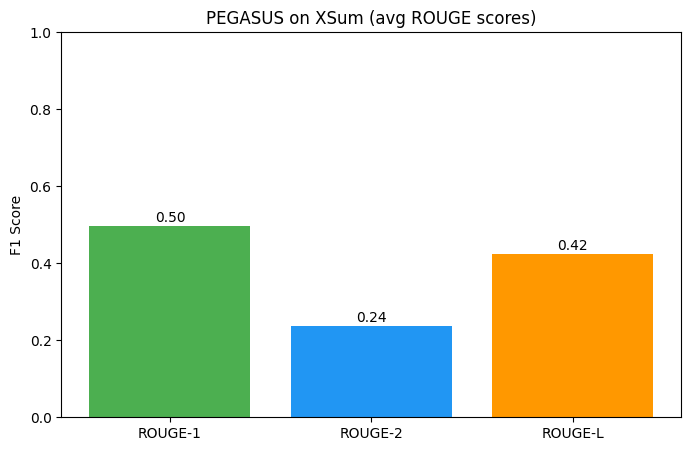

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract scores
rouge1 = [res["rouge1"] for res in rouge_results]
rouge2 = [res["rouge2"] for res in rouge_results]
rougeL = [res["rougeL"] for res in rouge_results]

# Average scores
avg_rouge1 = np.mean(rouge1)
avg_rouge2 = np.mean(rouge2)
avg_rougeL = np.mean(rougeL)

# Plot
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = [avg_rouge1, avg_rouge2, avg_rougeL]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['#4CAF50', '#2196F3', '#FF9800'])
plt.title('PEGASUS on XSum (avg ROUGE scores)')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Add score labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center')

plt.show()


In [ ]:
# Accuracy estimation: ROUGE-L > 0.5 considered "accurate"
threshold = 0.5
accurate_count = sum(1 for r in rouge_results if r["rougeL"] > threshold)
total_count = len(rouge_results)
approx_accuracy = accurate_count / total_count * 100

print(f"Approximate Accuracy (ROUGE-L > {threshold}): {approx_accuracy:.2f}%")


Approximate Accuracy (ROUGE-L > 0.5): 40.00%


In [ ]:
!pip install sentence-transformers --quiet
from sentence_transformers import SentenceTransformer, util

model_sim = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compute similarity scores
def compute_similarity(example):
    emb1 = model_sim.encode(example["summary"], convert_to_tensor=True)
    emb2 = model_sim.encode(example["generated_summary"], convert_to_tensor=True)
    sim_score = util.pytorch_cos_sim(emb1, emb2).item()
    return {"similarity": sim_score}

similarity_results = xsum_test.map(compute_similarity)

# Define threshold for accuracy
similarity_threshold = 0.8
accurate = sum(1 for ex in similarity_results if ex["similarity"] >= similarity_threshold)
similarity_accuracy = accurate / len(similarity_results) * 100

print(f"Embedding-based Accuracy (similarity ≥ {similarity_threshold}): {similarity_accuracy:.2f}%")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Embedding-based Accuracy (similarity ≥ 0.8): 60.00%


In [ ]:
import torch
print("Cuda available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device count:", torch.cuda.device_count())
else:
    print("On CPU, will be slower.")


Cuda available: False
On CPU, will be slower.


CNN

In [ ]:
# Step 1: Install
!pip install transformers datasets rouge-score nltk --quiet

# Step 2: Import
import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from datasets import load_dataset
from rouge_score import rouge_scorer
import nltk
nltk.download("punkt")

# Step 3: Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Step 4: Load model
model_name = "google/pegasus-cnn_dailymail"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

# Step 5: Load dataset (only 5 for now)
cnn_dm = load_dataset("cnn_dailymail", "3.0.0")
cnn_small = cnn_dm["test"].shuffle(seed=42).select(range(5))  # 🧪 test on 5 samples only

# Step 6: Define batch summarizer
def batch_generate(batch):
    inputs = tokenizer(batch["article"], truncation=True, padding="longest", return_tensors="pt", max_length=1024).to(device)
    with torch.no_grad():
        summaries = model.generate(inputs.input_ids, max_length=128, num_beams=4, early_stopping=True)
    decoded = [tokenizer.decode(g, skip_special_tokens=True) for g in summaries]
    return {"generated_summary": decoded}

# Step 7: Run summarization
cnn_summ = cnn_small.map(batch_generate, batched=True, batch_size=2)

# Step 8: Evaluate with ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["highlights"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure,
    }

rouge_results = cnn_summ.map(compute_rouge)
print("Sample ROUGE:", rouge_results[0])

# Optional: Accuracy
def exact_match(example):
    return {"exact_match": int(example["highlights"].strip() == example["generated_summary"].strip())}

acc_results = cnn_summ.map(exact_match)
acc_score = sum([x["exact_match"] for x in acc_results]) / len(acc_results)
print(f"Exact Match Accuracy: {acc_score:.2%}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cpu


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Sample ROUGE: {'article': '(CNN) I see signs of a revolution everywhere. I see it in the op-ed pages of the newspapers, and on the state ballots in nearly half the country. I see it in politicians who once preferred to play it safe with this explosive issue but are now willing to stake their political futures on it. I see the revolution in the eyes of sterling scientists, previously reluctant to dip a toe into this heavily stigmatized world, who are diving in head first. I see it in the new surgeon general who cites data showing just how helpful it can be. I see a revolution in the attitudes of everyday Americans. For the first time a majority, 53%, favor its legalization, with 77% supporting it for medical purposes. Support for legalization has risen 11 points in the past few years alone. In 1969, the first time Pew asked the question about legalization, only 12% of the nation was in favor. I see a revolution that is burning white hot among young people, but also shows up among the pa

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Exact Match Accuracy: 0.00%


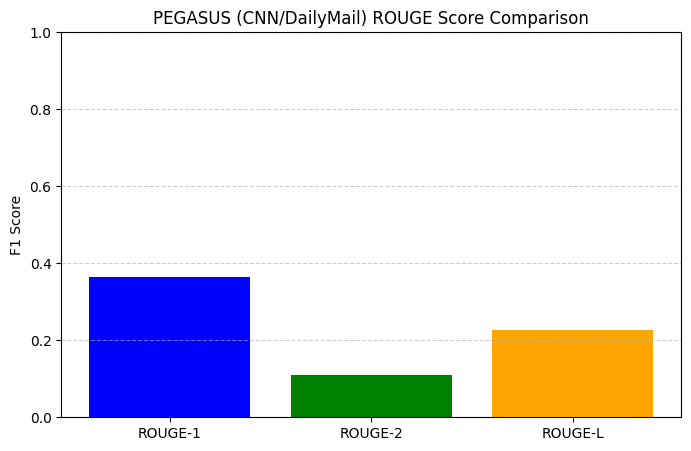

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Aggregate average ROUGE scores
avg_rouge1 = sum([x['rouge1'] for x in rouge_results]) / len(rouge_results)
avg_rouge2 = sum([x['rouge2'] for x in rouge_results]) / len(rouge_results)
avg_rougeL = sum([x['rougeL'] for x in rouge_results]) / len(rouge_results)

# Step 2: Plot ROUGE scores
plt.figure(figsize=(8, 5))
plt.bar(["ROUGE-1", "ROUGE-2", "ROUGE-L"], [avg_rouge1, avg_rouge2, avg_rougeL], color=['blue', 'green', 'orange'])
plt.title("PEGASUS (CNN/DailyMail) ROUGE Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


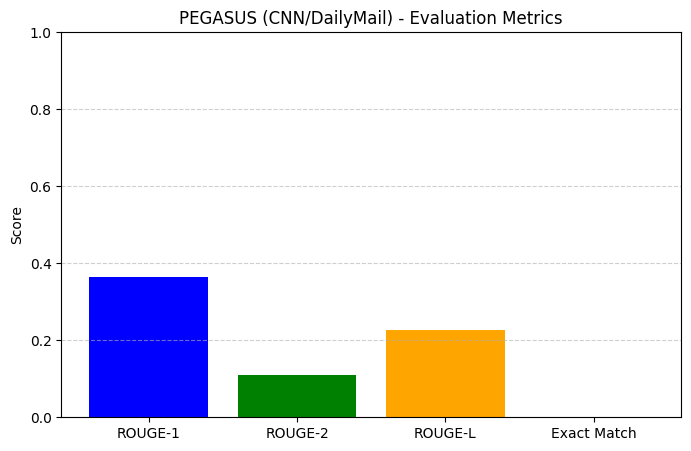

In [ ]:
# Combine ROUGE + Accuracy
metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "Exact Match"]
values = [avg_rouge1, avg_rouge2, avg_rougeL, acc_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange", "red"])
plt.title("PEGASUS (CNN/DailyMail) - Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


NEWSROOM

In [ ]:
# Step 1: Install and Import
!pip install transformers datasets nltk rouge-score --quiet

import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from datasets import load_dataset
from rouge_score import rouge_scorer
import nltk
nltk.download("punkt")

# Step 2: Load Model and Tokenizer
model_name = "google/pegasus-xsum"  # Still best for Newsroom use
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
print("Running on:", device)

# Step 3: Load Newsroom (Assumes preloaded JSONL is already extracted)
newsroom = load_dataset(
    "json",
    data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"}
)

newsroom_small = newsroom["test"].shuffle(seed=42).select(range(5))  # ⬅️ Reduce for testing

# Rename keys if needed
if "text" not in newsroom_small.column_names:
    newsroom_small = newsroom_small.rename_columns({"summary": "summary", "text": "text"})

# Step 4: Summarization Loop (Safe on CPU)
def generate_summary(example):
    inputs = tokenizer(example["text"], truncation=True, padding="longest", return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(inputs.input_ids, max_length=60, num_beams=4)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return {"generated_summary": summary}

# Generate summaries one-by-one to avoid OOM
generated_summaries = []
for example in newsroom_small:
    result = generate_summary(example)
    example["generated_summary"] = result["generated_summary"]
    generated_summaries.append(example)

# Step 5: Evaluate with ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge(ref, pred):
    scores = scorer.score(ref, pred)
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure
    }

# Apply ROUGE
for eg in generated_summaries:
    rouge = compute_rouge(eg["summary"], eg["generated_summary"])
    eg.update(rouge)

# Step 6: Print Results
for i, eg in enumerate(generated_summaries):
    print(f"\n📰 Sample {i+1}")
    print("Original Summary:", eg["summary"])
    print("Generated:", eg["generated_summary"])
    print("ROUGE-1:", round(eg["rouge1"], 4), "| ROUGE-2:", round(eg["rouge2"], 4), "| ROUGE-L:", round(eg["rougeL"], 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Running on: cpu


Generating test split: 0 examples [00:00, ? examples/s]


📰 Sample 1
Original Summary: Nobody wants to spend a lot of time and energy -- and taxpayer money -- and end up where they started. But that's what could happen with one of the principal elements of health reform, the "exchange" or "gateway."
Generated: As the Senate moves forward with its version of health reform, it is worth paying attention to the details.
ROUGE-1: 0.2456 | ROUGE-2: 0.0727 | ROUGE-L: 0.1754

📰 Sample 2
Original Summary: Apple’s chief executive Tim Cook demonstrated the new Apple Watch, ranging from $349 to $17,000, and announced a thinner MacBook laptop and cheaper Apple TV
Generated: Apple’s big event in San Francisco has come to an end.
ROUGE-1: 0.1538 | ROUGE-2: 0.0541 | ROUGE-L: 0.1538

📰 Sample 3
Original Summary: Democrats are struggling to put a fresh face on what for now continues to look like more of the same.
Generated: It's been a rough few weeks for the Democratic leadership in the US Senate.
ROUGE-1: 0.2286 | ROUGE-2: 0.0 | ROUGE-L: 0.1714

📰 Sample 4



✅ Exact Match Accuracy: 0.00%


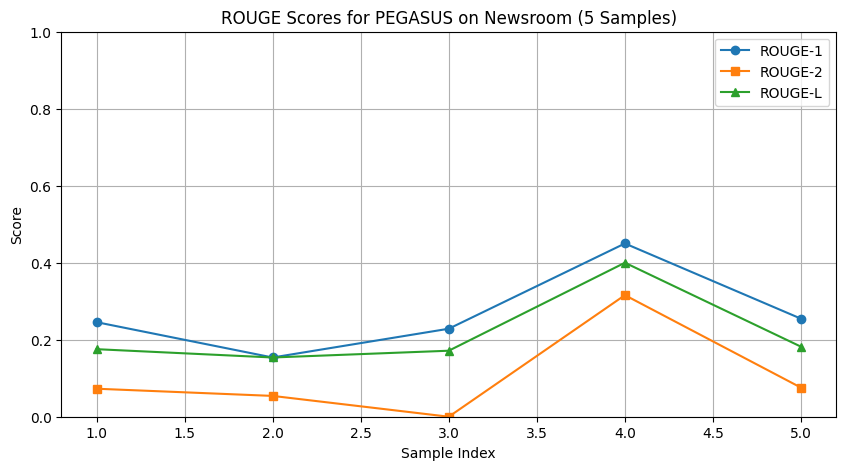

In [ ]:
import matplotlib.pyplot as plt

# Step 7: Accuracy Evaluation (Exact Match)
exact_matches = sum(1 for eg in generated_summaries if eg["summary"].strip().lower() == eg["generated_summary"].strip().lower())
accuracy = exact_matches / len(generated_summaries)
print(f"\n✅ Exact Match Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize ROUGE scores
rouge1_scores = [eg["rouge1"] for eg in generated_summaries]
rouge2_scores = [eg["rouge2"] for eg in generated_summaries]
rougeL_scores = [eg["rougeL"] for eg in generated_summaries]

plt.figure(figsize=(10, 5))
x = list(range(1, len(generated_summaries) + 1))
plt.plot(x, rouge1_scores, label="ROUGE-1", marker='o')
plt.plot(x, rouge2_scores, label="ROUGE-2", marker='s')
plt.plot(x, rougeL_scores, label="ROUGE-L", marker='^')
plt.title("ROUGE Scores for PEGASUS on Newsroom (5 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


## 2 BART

In [ ]:
# Step 1: Install dependencies
!pip install transformers datasets nltk rouge-score --quiet

# Step 2: Imports
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import load_dataset
import nltk
from rouge_score import rouge_scorer
nltk.download("punkt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Load BART
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name).to(device)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Device: cpu


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

XSUM

In [ ]:
# Load XSum
xsum = load_dataset("knkarthick/xsum")
xsum_small = xsum["test"].shuffle(seed=42).select(range(5))  # Small test set

# Summarize
def summarize(example):
    inputs = tokenizer(example["dialogue"], truncation=True, padding="longest", return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(inputs.input_ids, max_length=60, num_beams=4)
    summary = tokenizer.decode(output[0], skip_special_tokens=True)
    return {"generated_summary": summary}

xsum_result = xsum_small.map(summarize)

# Evaluate ROUGE
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
def compute_rouge(example):
    scores = scorer.score(example["summary"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure,
    }

xsum_result = xsum_result.map(compute_rouge)


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

In [ ]:
# Calculate Approximate Accuracy for BART on XSum
bart_xsum_accuracy = sum([ex["rougeL"] > 0.5 for ex in xsum_result]) / len(xsum_result)
print(f"Approximate Accuracy (ROUGE-L > 0.5): {round(bart_xsum_accuracy * 100, 2)}%")


Approximate Accuracy (ROUGE-L > 0.5): 0.0%


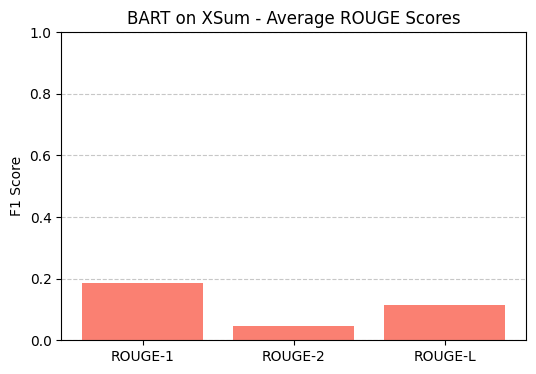

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge1 = [ex["rouge1"] for ex in xsum_result]
rouge2 = [ex["rouge2"] for ex in xsum_result]
rougeL = [ex["rougeL"] for ex in xsum_result]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(["ROUGE-1", "ROUGE-2", "ROUGE-L"],
        [sum(rouge1)/len(rouge1), sum(rouge2)/len(rouge2), sum(rougeL)/len(rougeL)],
        color="salmon")
plt.title("BART on XSum - Average ROUGE Scores")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


CNN

In [ ]:
# Step 1: Load dataset (5 test samples)
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_small = cnn["test"].shuffle(seed=42).select(range(5))

# Step 2: Load BART model and tokenizer
from transformers import BartTokenizer, BartForConditionalGeneration
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device

# Step 3: Summarize
def summarize_cnn(example):
    inputs = tokenizer(
        example["article"],
        truncation=True,
        padding="max_length",
        max_length=1024,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        output = model.generate(inputs.input_ids, max_length=128, num_beams=4)

    return {
        "generated_summary": tokenizer.decode(output[0], skip_special_tokens=True)
    }

cnn_result = cnn_small.map(summarize_cnn)

# Step 4: Compute ROUGE
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["highlights"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure
    }

cnn_result = cnn_result.map(compute_rouge)

# Step 5: Accuracy
bart_cnn_accuracy = sum([ex["rougeL"] > 0.5 for ex in cnn_result]) / len(cnn_result)
print(f"Approximate Accuracy (ROUGE-L > 0.5): {round(bart_cnn_accuracy * 100, 2)}%")

# Step 6: Print samples
for i, ex in enumerate(cnn_result):
    print(f"\n📄 CNN Sample {i+1}")
    print("Original Summary:", ex["highlights"])
    print("Generated Summary:", ex["generated_summary"])
    print("ROUGE-1:", round(ex["rouge1"], 4), "| ROUGE-2:", round(ex["rouge2"], 4), "| ROUGE-L:", round(ex["rougeL"], 4))


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Approximate Accuracy (ROUGE-L > 0.5): 0.0%

📄 CNN Sample 1
Original Summary: CNN's Dr. Sanjay Gupta says we should legalize medical marijuana now .
He says he knows how easy it is do nothing "because I did nothing for too long"
Generated Summary: CNN's John Sutter says he sees signs of a medical marijuana revolution everywhere. For the first time a majority, 53%, favor its legalization, he says. Support for legalization has risen 11 points in the past few years alone. Sutter: "Weed 3" will be the first federally approved clinical study on the use of marijuana for PTSD.
ROUGE-1: 0.2326 | ROUGE-2: 0.0952 | ROUGE-L: 0.186

📄 CNN Sample 2
Original Summary: Child has amassed thousands of Twitter followers with 'gang life' photos .
In one video he points gun at camera as adults look on unfazed .
His tweets have prompted backlash with calls for intervention .
Generated Summary: Baby-faced boy from Memphis, Tennessee, has amassed more than 3,000 followers on Twitter. In many pictures he is smo

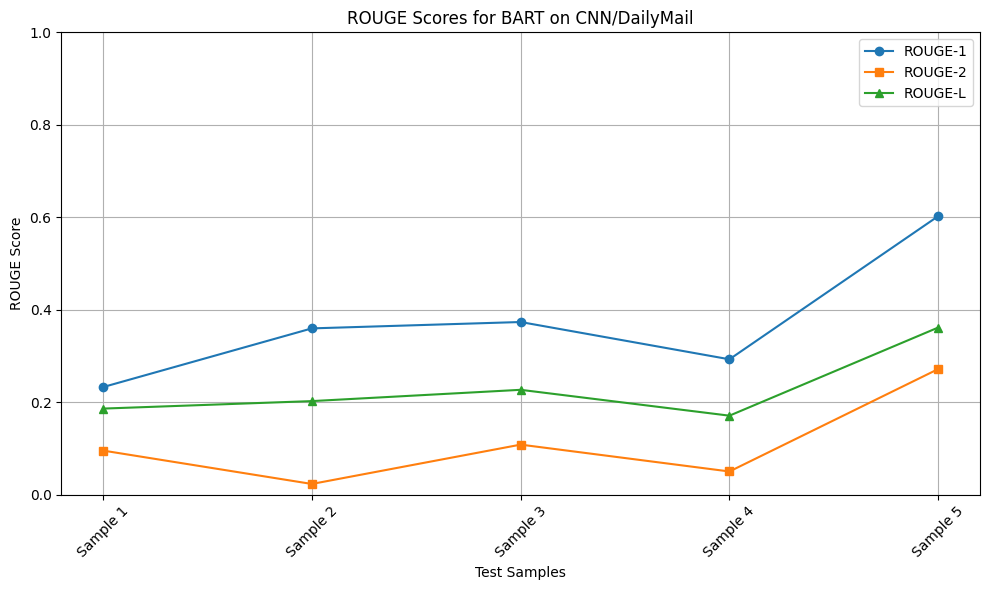

In [ ]:
import matplotlib.pyplot as plt

# Extract scores
rouge1_scores = [ex["rouge1"] for ex in cnn_result]
rouge2_scores = [ex["rouge2"] for ex in cnn_result]
rougeL_scores = [ex["rougeL"] for ex in cnn_result]

# Create x-axis labels
samples = [f"Sample {i+1}" for i in range(len(cnn_result))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(samples, rouge1_scores, marker="o", label="ROUGE-1")
plt.plot(samples, rouge2_scores, marker="s", label="ROUGE-2")
plt.plot(samples, rougeL_scores, marker="^", label="ROUGE-L")

plt.title("ROUGE Scores for BART on CNN/DailyMail")
plt.xlabel("Test Samples")
plt.ylabel("ROUGE Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NEWSROOM


In [ ]:
# Step 1: Imports and Setup
from datasets import load_dataset
from transformers import BartTokenizer, BartForConditionalGeneration
from rouge_score import rouge_scorer
import torch
import nltk

nltk.download("punkt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)

# Step 2: Load Model and Tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name).to(device)

# Step 3: Load Newsroom Test Data
newsroom = load_dataset(
    "json",
    data_files={"test": "/root/tensorflow_datasets/downloads/manual/newsroom/test.jsonl"}
)
newsroom_small = newsroom["test"].shuffle(seed=42).select(range(5))  # Use 5 samples for speed

# Step 4: Summarization Function with Truncation Fix
def summarize_newsroom(example):
    inputs = tokenizer(
        example["text"],
        max_length=1024,            # limit to BART max input
        truncation=True,
        padding="longest",
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_length=60,
            num_beams=4,
            early_stopping=True
        )

    return {"generated_summary": tokenizer.decode(outputs[0], skip_special_tokens=True)}

# Step 5: Apply Summarization
newsroom_result = newsroom_small.map(summarize_newsroom)

# Step 6: ROUGE Evaluation
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["summary"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure,
    }

newsroom_result = newsroom_result.map(compute_rouge)

# Step 7: Print Results
for i, eg in enumerate(newsroom_result):
    print(f"\n📰 Sample {i+1}")
    print("Original Summary:", eg["summary"])
    print("Generated:", eg["generated_summary"])
    print("ROUGE-1:", round(eg["rouge1"], 4), "| ROUGE-2:", round(eg["rouge2"], 4), "| ROUGE-L:", round(eg["rougeL"], 4))

# Step 8: Accuracy
accuracy = sum([eg["rougeL"] > 0.5 for eg in newsroom_result]) / len(newsroom_result)
print(f"\n📊 Approximate Accuracy (ROUGE-L > 0.5): {round(accuracy * 100, 2)}%")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Running on: cpu


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]


📰 Sample 1
Original Summary: Nobody wants to spend a lot of time and energy -- and taxpayer money -- and end up where they started. But that's what could happen with one of the principal elements of health reform, the "exchange" or "gateway."
Generated: Senate bill would preserve the possibility that insurers could tailor policies to draw healthy individuals out of the new markets. Bill would not require insurers operating outside the marketplace to provide standardized disclosures about what they cover. House bill would cut through some of the confusion by offering three tiers of coverage within each exchange
ROUGE-1: 0.2366 | ROUGE-2: 0.022 | ROUGE-L: 0.1505

📰 Sample 2
Original Summary: Apple’s chief executive Tim Cook demonstrated the new Apple Watch, ranging from $349 to $17,000, and announced a thinner MacBook laptop and cheaper Apple TV
Generated: Pre-orders start on 10 April, with the device going on sale on 24 April in nine countries: Australia, Canada, China, France, Germany

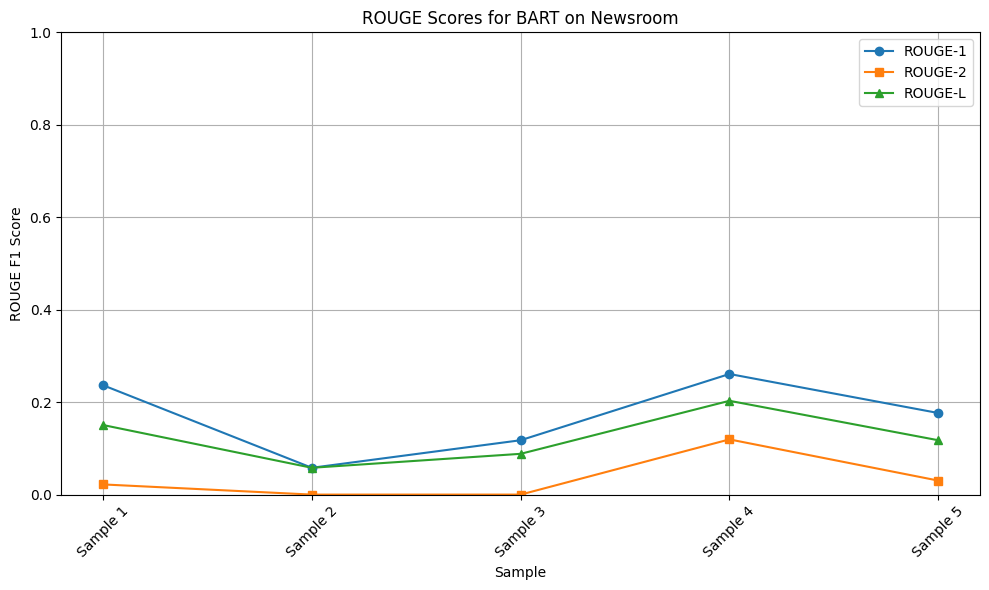

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge1 = [round(ex["rouge1"], 4) for ex in newsroom_result]
rouge2 = [round(ex["rouge2"], 4) for ex in newsroom_result]
rougeL = [round(ex["rougeL"], 4) for ex in newsroom_result]
labels = [f"Sample {i+1}" for i in range(len(newsroom_result))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(labels, rouge1, label="ROUGE-1", marker='o')
plt.plot(labels, rouge2, label="ROUGE-2", marker='s')
plt.plot(labels, rougeL, label="ROUGE-L", marker='^')

plt.title("ROUGE Scores for BART on Newsroom")
plt.xlabel("Sample")
plt.ylabel("ROUGE F1 Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3.t5-base

XSUM

In [ ]:
# Step 1: Install dependencies
!pip install transformers datasets rouge-score nltk --quiet

# Step 2: Import libraries
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
from rouge_score import rouge_scorer
import nltk
nltk.download('punkt')

# Step 3: Load model and tokenizer
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
print("Using device:", device)

# Step 4: Load dataset (XSum)
xsum = load_dataset("knkarthick/xsum")
xsum_small = xsum["test"].shuffle(seed=42).select(range(5))  # Sample only 5

# Step 5: Define summarization function
def summarize(example):
    input_text = "summarize: " + example["dialogue"]
    inputs = tokenizer(input_text, return_tensors="pt", padding="longest", truncation=True).to(device)
    with torch.no_grad():
        outputs = model.generate(inputs.input_ids, max_length=60, num_beams=4)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return {"generated_summary": summary}

# Step 6: Generate summaries
xsum_result = xsum_small.map(summarize)

# Step 7: Evaluate with ROUGE
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["summary"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure
    }

xsum_result = xsum_result.map(compute_rouge)

# Step 8: Print sample outputs with ROUGE
for i, ex in enumerate(xsum_result):
    print(f"\n📄 Sample {i+1}")
    print("Original Summary:", ex["summary"])
    print("Generated Summary:", ex["generated_summary"])
    print("ROUGE-1:", round(ex["rouge1"], 4), "| ROUGE-2:", round(ex["rouge2"], 4), "| ROUGE-L:", round(ex["rougeL"], 4))

# Step 9: Approximate Accuracy (ROUGE-L > 0.5)
accuracy = sum([ex["rougeL"] > 0.5 for ex in xsum_result]) / len(xsum_result)
print(f"\n✅ Approximate Accuracy (ROUGE-L > 0.5): {round(accuracy * 100, 2)}%")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Using device: cpu


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/5 [00:00<?, ? examples/s]


📄 Sample 1
Original Summary: A woman who was seriously hurt in a fatal hen party motorway crash is now helping other major trauma victims rebuild their lives.
Generated Summary: 21 women were heading to Liverpool when their minibus was hit by a lorry . their friend, 18-year-old Bethany Jones, was killed while they were badly hurt . minibus driver James Johnson was jailed for more than six years for causing her
ROUGE-1: 0.1231 | ROUGE-2: 0.0 | ROUGE-L: 0.0923

📄 Sample 2
Original Summary: A Tudor manor house has reopened following a £2.2m makeover.
Generated Summary: bramall hall in stockport, gm, has been renovated . 1,400 tickets have been sold for the opening weekend . the manor dates back to the reign of William the Conqueror .
ROUGE-1: 0.1 | ROUGE-2: 0.0 | ROUGE-L: 0.05

📄 Sample 3
Original Summary: Walt Disney World has unveiled a lighthouse memorial for a young boy who was killed by an alligator while on holiday at the Florida theme park.
Generated Summary: two-year-old dragged 

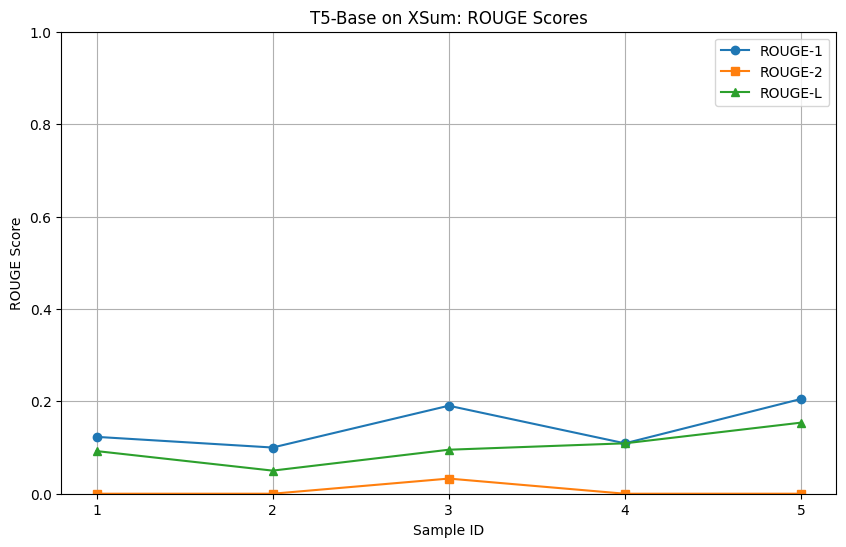

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE scores from xsum_result
rouge1_scores = [ex["rouge1"] for ex in xsum_result]
rouge2_scores = [ex["rouge2"] for ex in xsum_result]
rougeL_scores = [ex["rougeL"] for ex in xsum_result]
sample_ids = list(range(1, len(xsum_result) + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sample_ids, rouge1_scores, label="ROUGE-1", marker="o")
plt.plot(sample_ids, rouge2_scores, label="ROUGE-2", marker="s")
plt.plot(sample_ids, rougeL_scores, label="ROUGE-L", marker="^")
plt.xlabel("Sample ID")
plt.ylabel("ROUGE Score")
plt.title("T5-Base on XSum: ROUGE Scores")
plt.xticks(sample_ids)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


CNN

In [ ]:
# Step 1: Install dependencies
!pip install transformers datasets rouge-score nltk --quiet

# Step 2: Import libraries
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
from rouge_score import rouge_scorer
import nltk
nltk.download('punkt')

# Step 3: Load model and tokenizer
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
device = model.device
print("Using device:", device)

# Step 4: Load CNN/DailyMail dataset
cnn = load_dataset("cnn_dailymail", "3.0.0")
cnn_small = cnn["test"].shuffle(seed=42).select(range(5))  # Sample only 5

# Step 5: Summarization function
def summarize_cnn(example):
    input_text = "summarize: " + example["article"]
    inputs = tokenizer(input_text, return_tensors="pt", padding="longest", truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model.generate(inputs.input_ids, max_length=60, num_beams=4)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return {"generated_summary": summary}

# Step 6: Generate summaries
cnn_result = cnn_small.map(summarize_cnn)

# Step 7: ROUGE Evaluation
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge(example):
    scores = scorer.score(example["highlights"], example["generated_summary"])
    return {
        "rouge1": scores["rouge1"].fmeasure,
        "rouge2": scores["rouge2"].fmeasure,
        "rougeL": scores["rougeL"].fmeasure
    }

cnn_result = cnn_result.map(compute_rouge)

# Step 8: Print Sample Results
for i, ex in enumerate(cnn_result):
    print(f"\n📄 CNN Sample {i+1}")
    print("Original Summary:", ex["highlights"])
    print("Generated Summary:", ex["generated_summary"])
    print("ROUGE-1:", round(ex["rouge1"], 4), "| ROUGE-2:", round(ex["rouge2"], 4), "| ROUGE-L:", round(ex["rougeL"], 4))

# Step 9: Approximate Accuracy (ROUGE-L > 0.5)
accuracy = sum([ex["rougeL"] > 0.5 for ex in cnn_result]) / len(cnn_result)
print(f"\n✅ Approximate Accuracy (ROUGE-L > 0.5): {round(accuracy * 100, 2)}%")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cpu


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]


📄 CNN Sample 1
Original Summary: CNN's Dr. Sanjay Gupta says we should legalize medical marijuana now .
He says he knows how easy it is do nothing "because I did nothing for too long"
Generated Summary: a majority, 53%, favor its legalization, with 77% supporting it for medical purposes . support for legalization has risen 11 points in the past few years alone . a police officer in Michigan is part of the revolution, as are the editors of the medical journal
ROUGE-1: 0.137 | ROUGE-2: 0.0 | ROUGE-L: 0.0822

📄 CNN Sample 2
Original Summary: Child has amassed thousands of Twitter followers with 'gang life' photos .
In one video he points gun at camera as adults look on unfazed .
His tweets have prompted backlash with calls for intervention .
Generated Summary: the baby-faced boy from Memphis, tn, regularly posts pictures of 'gang life' he has amassed more than 3,000 followers on twitter . in one video he laughs and points a gun at the camera in an apparent attempt to look me
ROUGE-1: 0.4

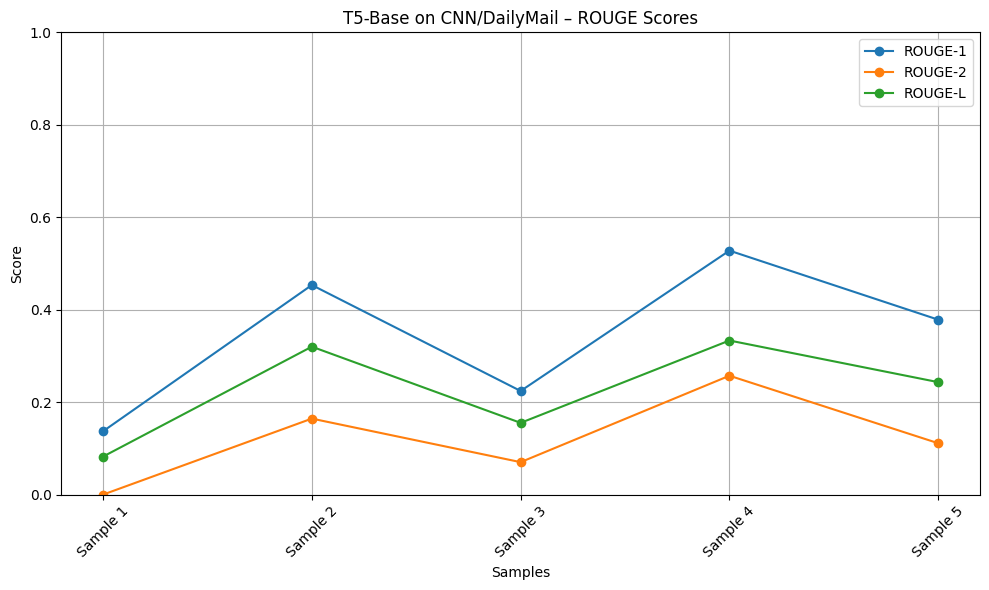

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge1_scores = [ex["rouge1"] for ex in cnn_result]
rouge2_scores = [ex["rouge2"] for ex in cnn_result]
rougeL_scores = [ex["rougeL"] for ex in cnn_result]

samples = [f"Sample {i+1}" for i in range(len(cnn_result))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(samples, rouge1_scores, marker='o', label='ROUGE-1')
plt.plot(samples, rouge2_scores, marker='o', label='ROUGE-2')
plt.plot(samples, rougeL_scores, marker='o', label='ROUGE-L')

plt.title("T5-Base on CNN/DailyMail – ROUGE Scores")
plt.xlabel("Samples")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NEWSROOM